In [504]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

a) Exploración inicial del dataset 

Leer el archivo y examinar sus dimensiones. Identificar las columnas disponibles y los 
tipos de datos que contiene. 

In [79]:
df = pd.read_csv('PFDA_fraud_car.csv', sep=';', index_col=0)

In [80]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [81]:
df.shape

(15420, 33)

In [82]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15097 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15205 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null  int

In [84]:
df1=df

In [571]:
df1.FraudFound_P.value_counts()

FraudFound_P
0    14208
1      892
Name: count, dtype: int64

In [85]:
df1.duplicated().sum()

np.int64(0)

In [86]:
df1['AccidentArea'].isnull().sum()

np.int64(323)

In [87]:
df1['AccidentArea'] = df1['AccidentArea'].fillna('Unknown')

In [88]:
df1['AccidentArea'].unique()

array(['Urban', 'Rural', 'Unknown'], dtype=object)

In [89]:
df1['MaritalStatus'].isnull().sum()

np.int64(215)

In [90]:
df1['MaritalStatus']=df1['MaritalStatus'].fillna('No Register')

In [91]:
df1['MaritalStatus'].unique()

array(['Single', 'Married', 'No Register', 'Widow', 'Divorced'],
      dtype=object)

In [92]:
df1.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [93]:
df1.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


<Axes: ylabel='Age'>

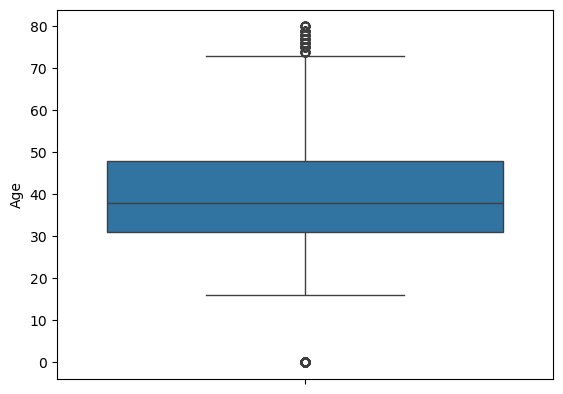

In [94]:
sns.boxplot(df['Age'])

In [95]:
porcentaje_edad_0 = len(df[df['Age'] == 0]) / len(df) * 100
round(porcentaje_edad_0,2)

2.08

In [96]:
## Al ver la data, con 320 registros de edad 0, decidimos eliminar, ya que solo representan el 2.08% de la data total

df1['Age'].value_counts().sort_index()

Age
0     320
16      9
17      6
18     48
19     32
     ... 
76     42
77     29
78     35
79     20
80     32
Name: count, Length: 66, dtype: int64

In [97]:
df1.loc[df1['Age'] == 0, ['Age', 'Sex', 'MaritalStatus', 'FraudFound_P']].head()

,Age,Sex,MaritalStatus,FraudFound_P
7,0,Male,Single,0
13,0,Male,Single,0
28,0,Male,No Register,1
31,0,Male,Single,0
58,0,Male,Single,0


In [365]:
## Limpiamos la data
df1 = df1[df['Age'] != 0]
df1

C:\Users\ivonn\AppData\Local\Temp\ipykernel_27328\3895115393.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[df['Age'] != 0]


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,AgeGroup
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,(16-25)
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,(25-34)
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,(45-54)
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,(55-64)
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,(25-34)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision,(25-34)
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability,(25-34)
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,(16-25)
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils,(25-34)


<Axes: ylabel='Age'>

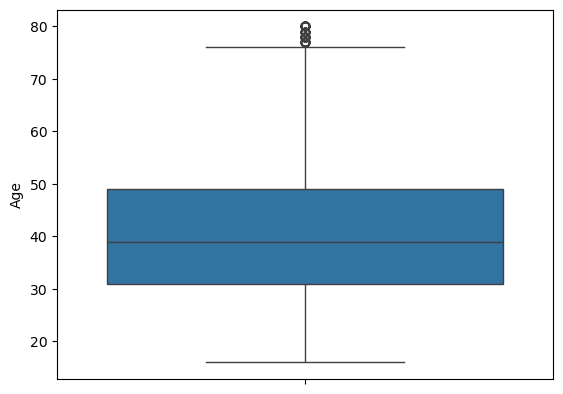

In [99]:
sns.boxplot(df1['Age'])

C:\Users\ivonn\AppData\Local\Temp\ipykernel_27328\3016689644.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1,x='Sex',y='DriverRating', palette='Set1')


<Axes: xlabel='Sex', ylabel='DriverRating'>

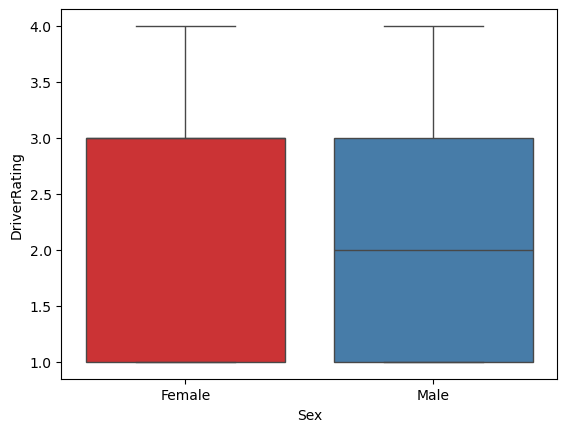

In [101]:
sns.boxplot(data=df1,x='Sex',y='DriverRating', palette='Set1')

In [573]:
orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

<Axes: xlabel='DayOfWeekClaimed', ylabel='count'>

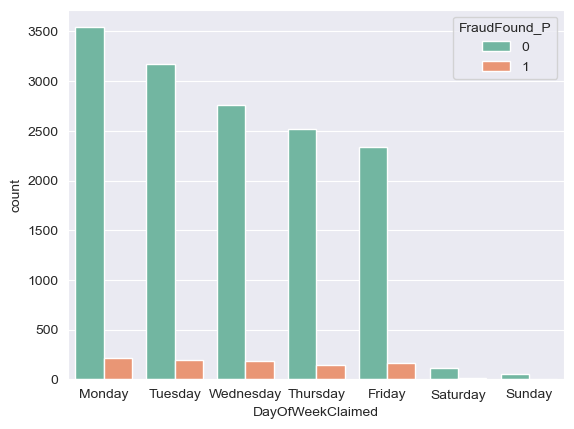

In [574]:
sns.countplot(x='DayOfWeekClaimed', hue='FraudFound_P',data=df, order=orden ,palette="Set2")

<Axes: xlabel='PoliceReportFiled', ylabel='count'>

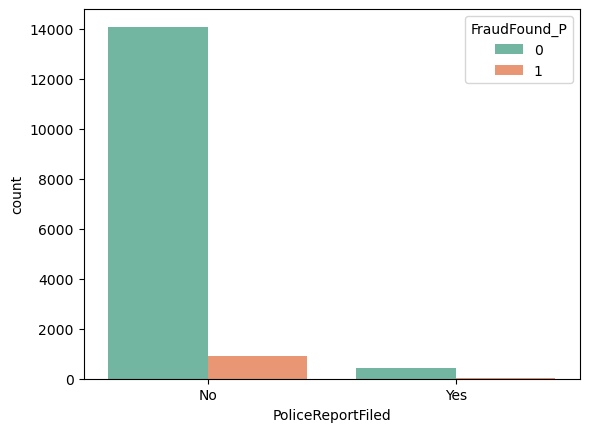

In [423]:
sns.countplot(x='PoliceReportFiled', hue='FraudFound_P',data=df,palette="Set2")

In [113]:
df['BasePolicy'].value_counts()

BasePolicy
Collision     5962
Liability     5009
All Perils    4449
Name: count, dtype: int64

In [114]:
df['AddressChange_Claim'].value_counts()

AddressChange_Claim
no change         14324
4 to 8 years        631
2 to 3 years        291
1 year              170
under 6 months        4
Name: count, dtype: int64

In [115]:
df1['VehiclePrice'].value_counts()

VehiclePrice
20000 to 29000     8079
30000 to 39000     3532
more than 69000    1846
less than 20000    1095
40000 to 59000      461
60000 to 69000       87
Name: count, dtype: int64

In [116]:
orden_precios= ['less than 20000',
    '20000 to 29000',
    '30000 to 39000',
    '40000 to 59000',
    '60000 to 69000',
    'more than 69000']

<Axes: xlabel='VehiclePrice', ylabel='count'>

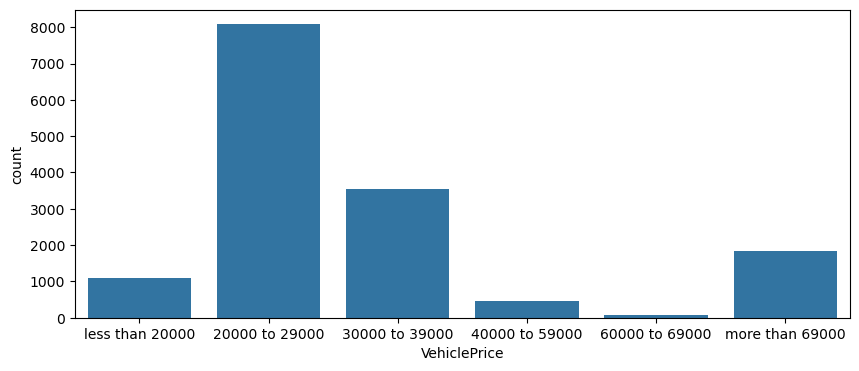

In [117]:
plt.figure(figsize=(10,4))
sns.countplot(data=df1, x='VehiclePrice', order=orden_precios)

C:\Users\ivonn\AppData\Local\Temp\ipykernel_27328\804781580.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PastNumberOfClaims', data=df1,palette="Set2")


<Axes: xlabel='PastNumberOfClaims', ylabel='count'>

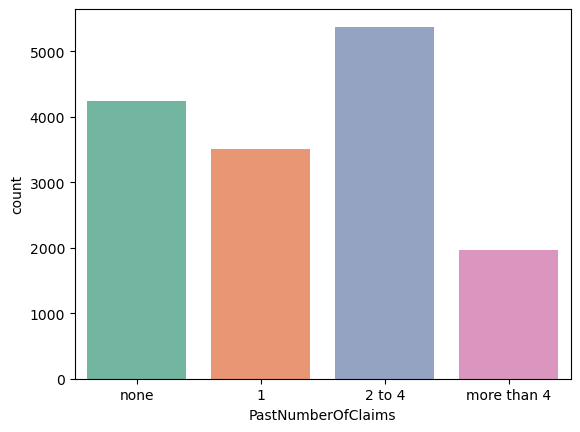

In [121]:
sns.countplot(x='PastNumberOfClaims', data=df1,palette="Set2")

In [576]:
df1_acc_area = (
    df1.groupby(['AccidentArea', 'FraudFound_P','VehicleCategory','Year'])
       .size()
       .reset_index(name='count')
)

df1_acc_area=df1_acc_area.sort_values(by='count',ascending=False)
df1_acc_area_fraud = df1_acc_area[df1_acc_area['FraudFound_P'] == 1]



In [575]:
df1_acc_area = (
    df1.groupby(['AccidentArea', 'FraudFound_P','VehicleCategory','Year'])
       .size()
       .reset_index(name='count')
)

In [577]:
df1_acc_area_nofraud = df1_acc_area[df1_acc_area['FraudFound_P'] == 0]


In [379]:
df1.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year,FraudFound_P_Rate
count,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,1.510000e+04
mean,2.791126,2.694371,40.700331,0.059073,7728.474768,8.479669,407.874172,2.488212,1994.869272,5.907285e+00
std,1.287610,1.259930,12.309493,0.235769,4442.247706,4.600028,44.391196,1.120435,0.803246,7.123427e-13
min,1.000000,1.000000,16.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000,5.907285e+00
25%,2.000000,2.000000,31.000000,0.000000,3889.750000,5.000000,400.000000,1.000000,1994.000000,5.907285e+00
50%,3.000000,3.000000,39.000000,0.000000,7731.500000,8.000000,400.000000,2.000000,1995.000000,5.907285e+00
75%,4.000000,4.000000,49.000000,0.000000,11576.250000,12.000000,400.000000,3.000000,1996.000000,5.907285e+00
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000,5.907285e+00


Text(0, 0.5, 'TASAS DE FRAUDE')

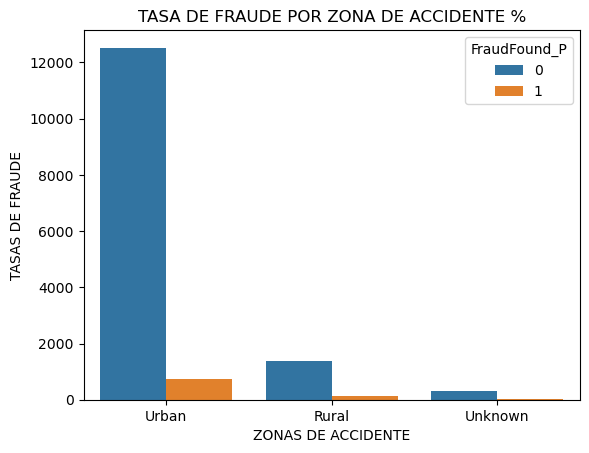

In [413]:
sns.countplot(data=df1, x='AccidentArea', hue='FraudFound_P')
plt.title('TASA DE FRAUDE POR ZONA DE ACCIDENTE %')
plt.xlabel('ZONAS DE ACCIDENTE')
plt.ylabel('TASAS DE FRAUDE')

Text(0.5, 0, 'PRECIO DE VEHICULO')

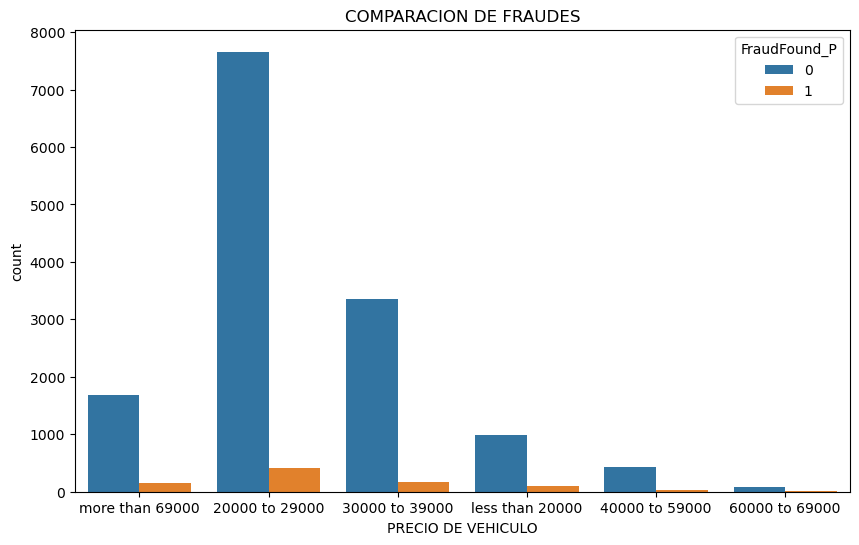

In [420]:
plt.figure(figsize=(10,6))
sns.countplot(data=df1, x='VehiclePrice',hue='FraudFound_P')
plt.title('COMPARACION DE FRAUDES')
plt.xlabel('PRECIO DE VEHICULO')


In [416]:
porcentaje_fraude_0 = len(df[df['FraudFound_P'] == 1]) / len(df) * 100
round(porcentaje_fraude_0,4)

5.9857

# *INSIGHTS* 

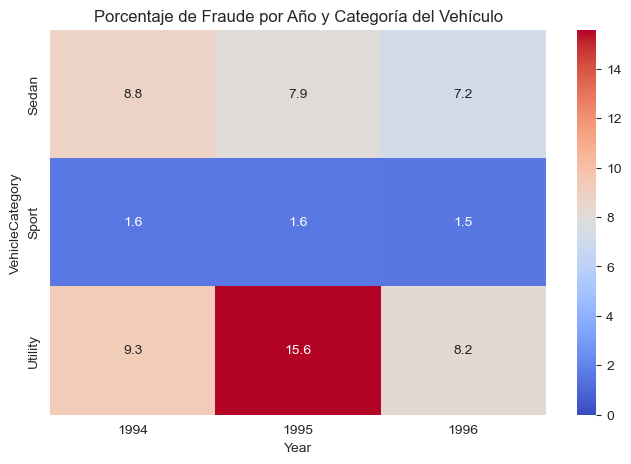

In [578]:
# Agrupamos por categoría, año y fraude
group = df1.groupby(["VehicleCategory", "Year"])["FraudFound_P"]

# Calculamos porcentaje de fraude (mean * 100)
pivot_total = (group.mean() * 100).reset_index()
pivot_total = pivot_total.pivot(index="VehicleCategory", columns="Year", values="FraudFound_P")

# Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(
    pivot_total,
    annot=True,
    fmt=".1f",
    cmap="coolwarm",
    vmin=0,
    vmax=pivot_total.max().max(),
)
plt.title("Porcentaje de Fraude por Año y Categoría del Vehículo")
plt.ylabel("VehicleCategory")
plt.show()


In [582]:
# Calcula porcentajes de fraude por cada categoría
pct = df.groupby("Days_Policy_Accident")["FraudFound_P"].mean().reset_index()

# Porcentaje
pct["FraudPercent"] = pct["FraudFound_P"] * 100

# Orden descendente
pct = pct.sort_values("FraudPercent", ascending=False)
pct

,Days_Policy_Accident,FraudFound_P,FraudPercent
4,none,0.163636,16.363636
2,8 to 15,0.090909,9.090909
0,1 to 7,0.071429,7.142857
1,15 to 30,0.061224,6.122449
3,more than 30,0.059356,5.935594


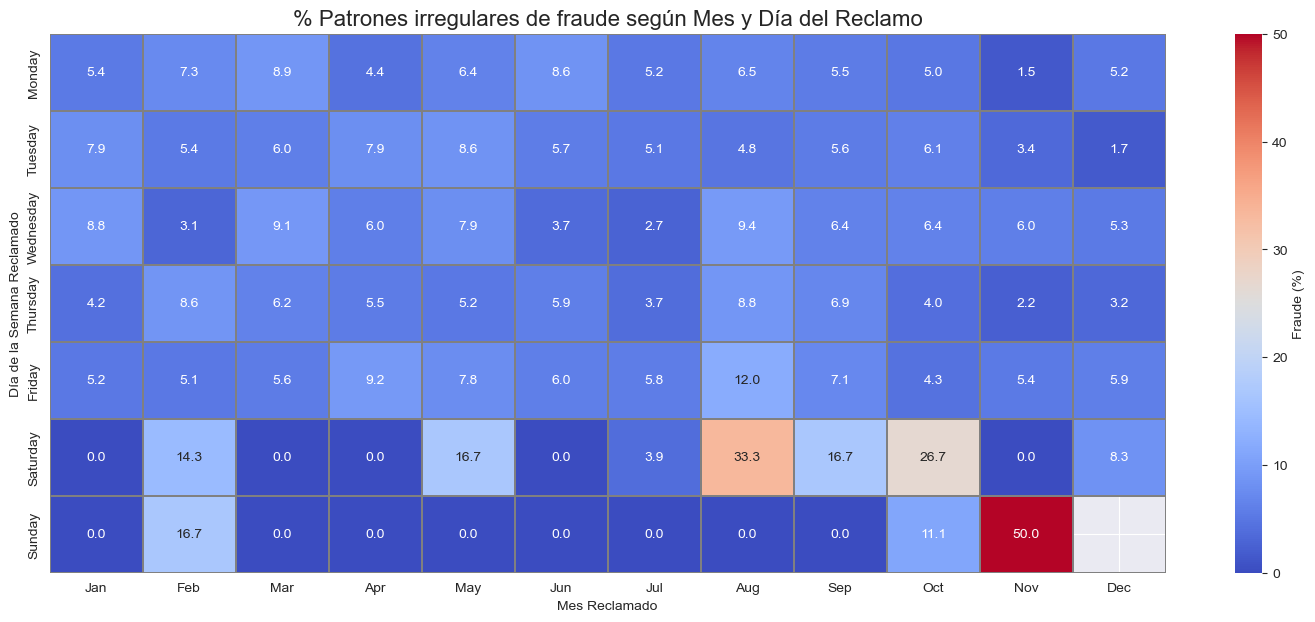

In [583]:
# 1. Tabla dinámica: % de fraude por Día × Mes
pivot_pct = df.pivot_table(
    index="DayOfWeekClaimed",      
    columns="MonthClaimed",        
    values="FraudFound_P",         # 0/1 - porcentaje
    aggfunc="mean"
) * 100

# 2. Redondear a 2 decimales
pivot_pct = pivot_pct.round(2)

# 3. Orden lógico de días 
order_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
pivot_pct = pivot_pct.reindex(order_days)

# 4. Orden lógico de meses 
order_months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
pivot_pct = pivot_pct[order_months]

#plt
plt.figure(figsize=(18, 7))
sns.heatmap(
    pivot_pct,
    annot=True,
    fmt=".1f",
    cmap="coolwarm",
    linewidths=0.3,
    linecolor="gray",
    cbar_kws={"label": "Fraude (%)"},
    vmin=0,            # MISMA ESCALA
    vmax=pivot_pct.max().max()
)

plt.title("% Patrones irregulares de fraude según Mes y Día del Reclamo", fontsize=16)
plt.xlabel("Mes Reclamado")
plt.ylabel("Día de la Semana Reclamado")

plt.show()

  PastNumberOfClaims  FraudRate  Total
3               none   0.075183   4243
0                  1   0.061841   3509
1             2 to 4   0.053923   5378
2        more than 4   0.033503   1970


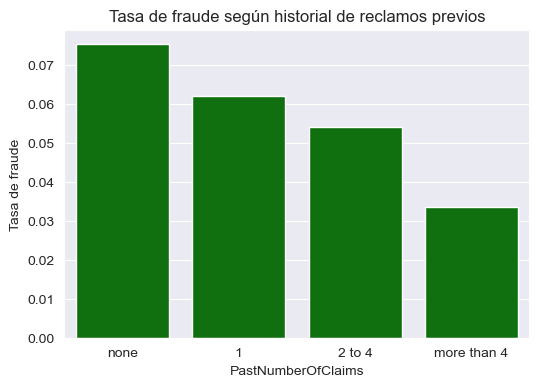

In [584]:
claims_fraude = (
    df1
    .groupby("PastNumberOfClaims")["FraudFound_P"]
    .agg(FraudRate="mean", Total="count")
    .reset_index()
    .sort_values("FraudRate", ascending=False)
)

print(claims_fraude)

plt.figure(figsize=(6,4))
sns.barplot(
    data=claims_fraude,
    x="PastNumberOfClaims",
    y="FraudRate",
    color='Green'
)
plt.ylabel("Tasa de fraude")
plt.title("Tasa de fraude según historial de reclamos previos")
plt.show()

  AgeOfVehicle  FraudRate  Total
2      4 years   0.091703    229
1      3 years   0.086093    151
3      5 years   0.070007   1357
4      6 years   0.066125   3448
5      7 years   0.055967   5807
6  more than 7   0.051759   3980
0      2 years   0.041096     73
7          new   0.018182     55


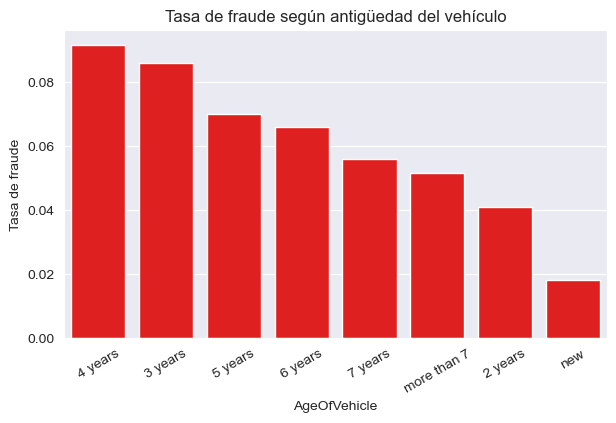

In [585]:
veh_fraude = (
    df1
    .groupby("AgeOfVehicle")["FraudFound_P"]
    .agg(FraudRate="mean", Total="count")
    .reset_index()
    .sort_values("FraudRate", ascending=False)
)

print(veh_fraude)

plt.figure(figsize=(7,4))
sns.barplot(
    data=veh_fraude,
    x="AgeOfVehicle",
    y="FraudRate",
    color='Red'
)
plt.xticks(rotation=30)
plt.ylabel("Tasa de fraude")
plt.title("Tasa de fraude según antigüedad del vehículo")
plt.show()

  PoliceReportFiled WitnessPresent  FraudRate  Total
0                No             No   5.978409  14636
1                No            Yes   4.444444     45
2               Yes             No   3.693931    379
3               Yes            Yes   2.500000     40


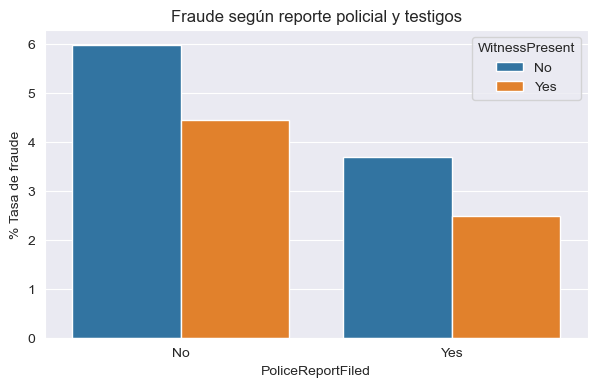

In [586]:
evidencia = (
       df1
    .groupby(["PoliceReportFiled", "WitnessPresent"])["FraudFound_P"]
    .agg(FraudRate=lambda x: x.mean() * 100, Total="count")   
    .reset_index()
)

print(evidencia)

plt.figure(figsize=(7,4))
sns.barplot(
    data=evidencia,
    x="PoliceReportFiled",
    y="FraudRate",
    hue="WitnessPresent"
)


plt.ylabel("% Tasa de fraude")
plt.title("Fraude según reporte policial y testigos")
plt.show()


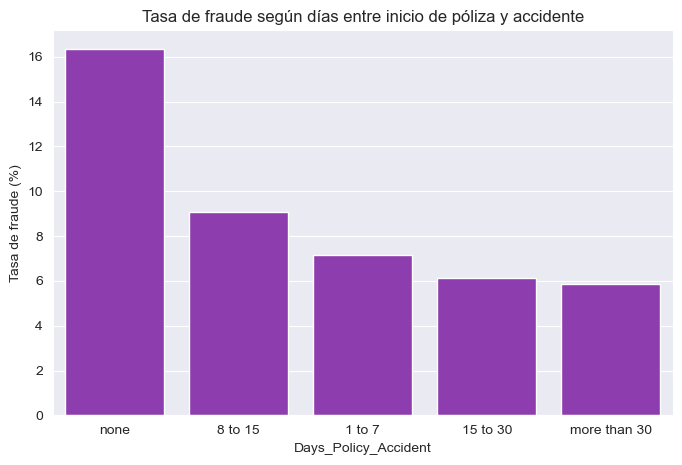

In [591]:
# Calcular tasas de fraude
fraude_days = (
    df1.groupby("Days_Policy_Accident")["FraudFound_P"]
    .mean()
    .reset_index()
)

#  porcentaje
fraude_days["FraudPercent"] = fraude_days["FraudFound_P"] * 100

# Orden DESCENDENTE
fraude_days = fraude_days.sort_values("FraudPercent", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(
    data=fraude_days,
    x="Days_Policy_Accident",
    y="FraudPercent",
    color="#952ac0"
)


plt.ylabel("Tasa de fraude (%)")
plt.title("Tasa de fraude según días entre inicio de póliza y accidente")
plt.xticks(rotation=0)
plt.show()


## FACTS

C:\Users\ivonn\AppData\Local\Temp\ipykernel_27328\4271313321.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ivonn\AppData\Local\Temp\ipykernel_27328\4271313321.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


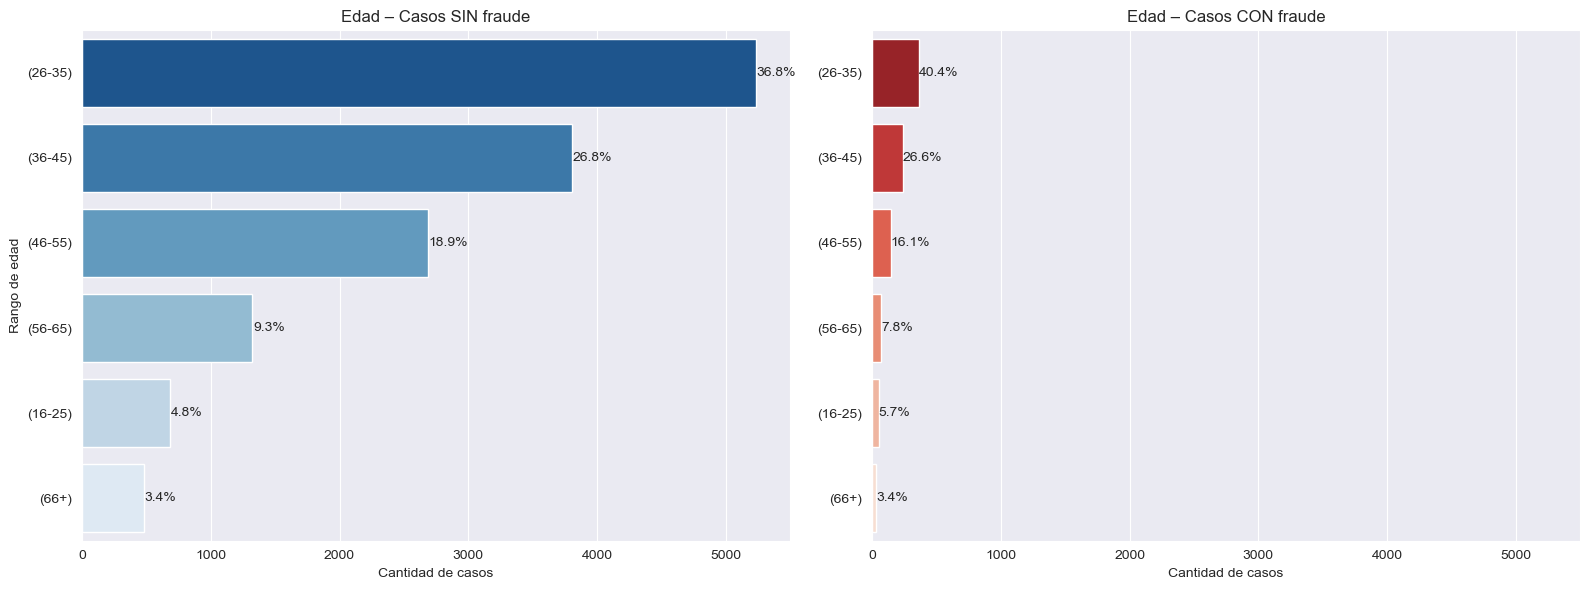

In [566]:
# --- Conteos por grupo de edad ---
no_fraud_counts = df1_Age_NoFraud['AgeGroup'].value_counts().sort_values(ascending=False)
fraud_counts = df1_Age_Fraud['AgeGroup'].value_counts().sort_values(ascending=False)

# --- Porcentajes ---
no_fraud_pct = (no_fraud_counts / no_fraud_counts.sum()) * 100
fraud_pct = (fraud_counts / fraud_counts.sum()) * 100

#Papelografo
fig, axes = plt.subplots(1, 2, figsize=(16, 6))


#   GRAFICO 1: NO FRAUDE 

sns.barplot(
    ax=axes[0],
    y=no_fraud_counts.index,           # categorías
    x=no_fraud_counts.values,          # conteos
    palette='Blues_r',
    order=no_fraud_counts.index        
)

axes[0].set_title("Edad – Casos SIN fraude")
axes[0].set_xlabel("Cantidad de casos")
axes[0].set_ylabel("Rango de edad")

# Añadir porcentajes
for i, (count, pct) in enumerate(zip(no_fraud_counts.values, no_fraud_pct.values)):
    axes[0].text(count + 5, i, f"{pct:.1f}%", va='center')


#   GRAFICO 2: FRAUDE 

sns.barplot(
    ax=axes[1],
    y=fraud_counts.index,
    x=fraud_counts.values,
    palette='Reds_r',
    order=fraud_counts.index           
)

axes[0].set_xlim(0, 5500)
axes[1].set_xlim(0, 5500)
axes[1].set_title("Edad – Casos CON fraude")
axes[1].set_xlabel("Cantidad de casos")
axes[1].set_ylabel("")

# Añadir porcentajes
for i, (count, pct) in enumerate(zip(fraud_counts.values, fraud_pct.values)):
    axes[1].text(count + 0.75, i, f"{pct:.1f}%", va='center')

plt.tight_layout()
plt.show()

C:\Users\ivonn\AppData\Local\Temp\ipykernel_27328\1746414747.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_age_rating = df_fraud.pivot_table(


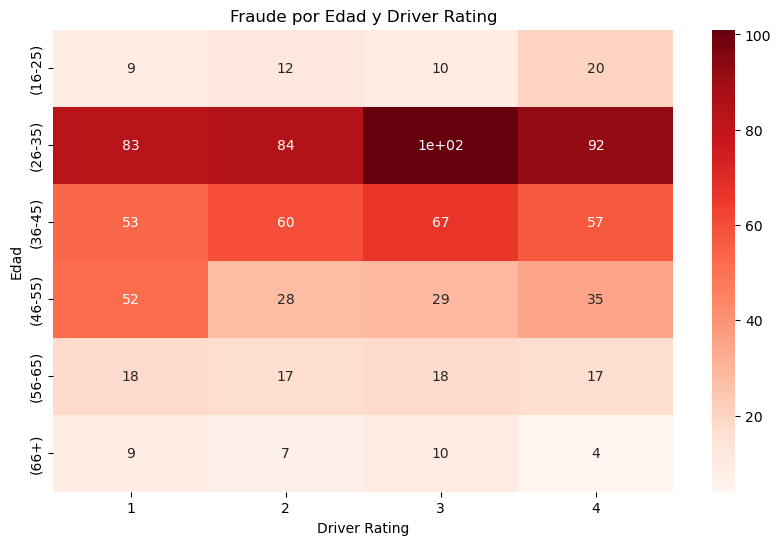

In [459]:
df_fraud = df1[df1['FraudFound_P'] == 1]

pivot_age_rating = df_fraud.pivot_table(
    index='AgeGroup',
    columns='DriverRating',
    values='FraudFound_P',
    aggfunc='count',
    fill_value=0
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot_age_rating, annot=True, cmap='Reds')
plt.title("Fraude por Edad y Driver Rating")
plt.xlabel("Driver Rating")
plt.ylabel("Edad")
plt.show()

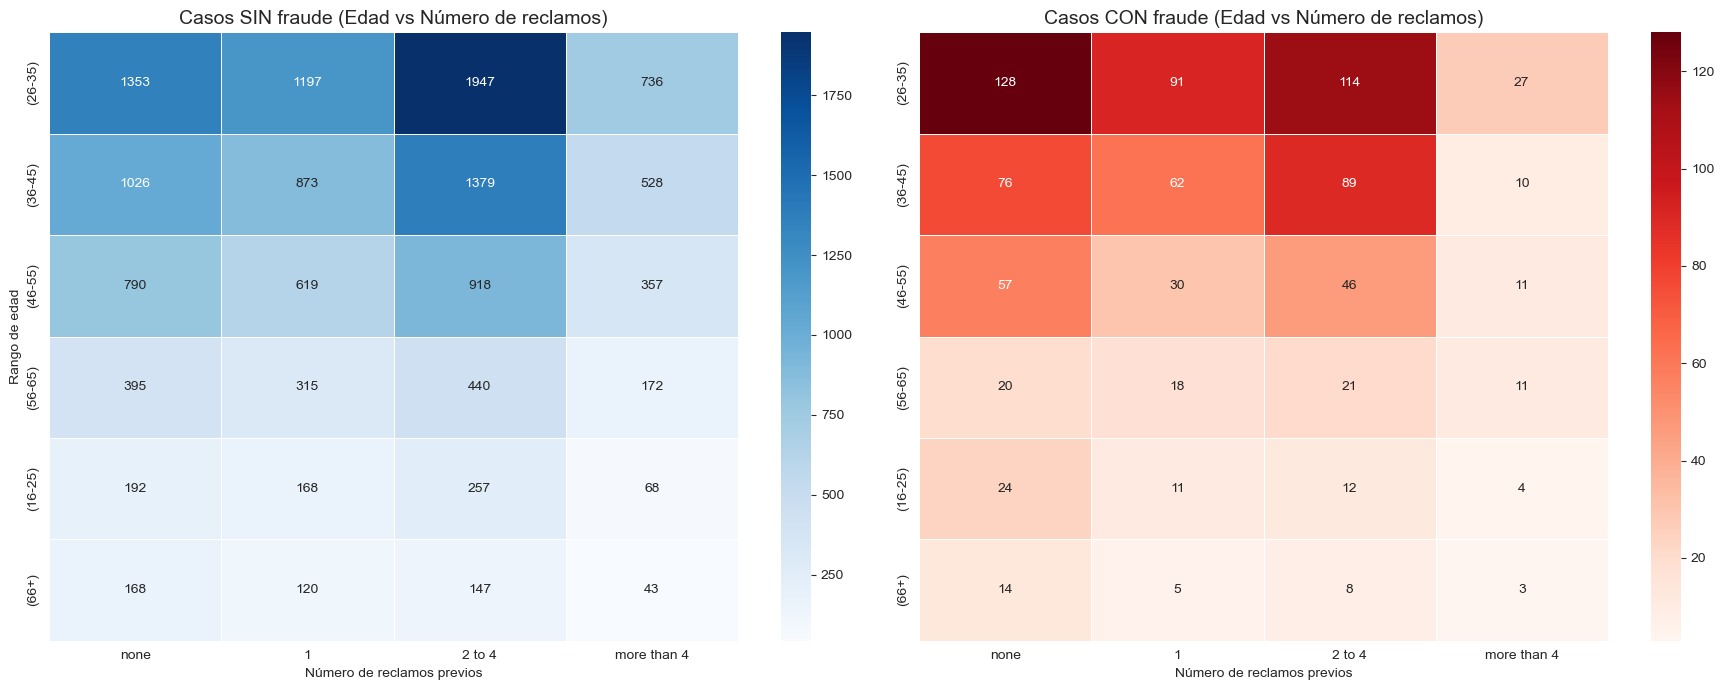

In [579]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# --- Heatmap No Fraude ---
sns.heatmap(
    table_no_fraud,
    annot=True,
    cmap='Blues',
    linewidths=0.5,
    linecolor='white',
    fmt='g',
    ax=axes[0]
)
axes[0].set_title("Casos SIN fraude (Edad vs Número de reclamos)", fontsize=14)
axes[0].set_xlabel("Número de reclamos previos")
axes[0].set_ylabel("Rango de edad")

# --- Heatmap Fraude ---
sns.heatmap(
    table_fraud,
    annot=True,
    cmap='Reds',
    linewidths=0.5,
    linecolor='white',
    fmt='g',
    ax=axes[1]
)
axes[1].set_title("Casos CON fraude (Edad vs Número de reclamos)", fontsize=14)
axes[1].set_xlabel("Número de reclamos previos")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

In [465]:
df_agrupado=df1.groupby(["FraudFound_P","PoliceReportFiled","VehicleCategory"])["Fault"].value_counts().reset_index(name='count')
df_agrupado

,FraudFound_P,PoliceReportFiled,VehicleCategory,Fault,count
0,0,No,Sedan,Policy Holder,5379
1,0,No,Sedan,Third Party,3064
2,0,No,Sport,Policy Holder,4161
3,0,No,Sport,Third Party,868
4,0,No,Utility,Policy Holder,298
5,0,No,Utility,Third Party,34
6,0,Yes,Sedan,Policy Holder,182
7,0,Yes,Sedan,Third Party,118
8,0,Yes,Sport,Policy Holder,70
9,0,Yes,Sport,Third Party,26


In [466]:
tabla_fraudes = df_agrupado.pivot_table(
    index='VehicleCategory',
    columns='Fault',
    values='count',
    aggfunc='sum',
    fill_value=0
)
tabla_fraudes


Fault,Policy Holder,Third Party
VehicleCategory,,
Sedan,6295,3215
Sport,4310,898
Utility,347,35


In [467]:
order_months_desc = (
    df1['MonthClaimed']
    .value_counts()
    .sort_values(ascending=False)
    .index
)

In [468]:
order_fraud = (
    df1[df1['FraudFound_P'] == 1]['MonthClaimed']
    .value_counts()
    .sort_values(ascending=False)
    .index
)

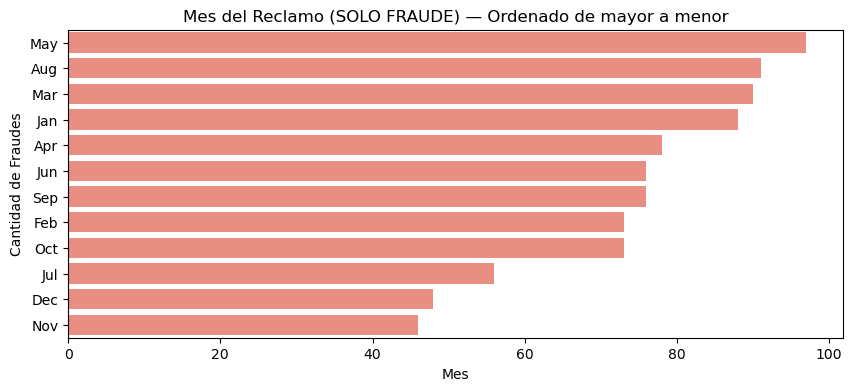

In [469]:
plt.figure(figsize=(10,4))
sns.countplot(
    data=df1[df1['FraudFound_P'] == 1],
    y='MonthClaimed',
    order=order_fraud,        
    color='salmon'
)

plt.title("Mes del Reclamo (SOLO FRAUDE) — Ordenado de mayor a menor")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Fraudes")
plt.show()

C:\Users\ivonn\AppData\Local\Temp\ipykernel_27328\1988405376.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(
C:\Users\ivonn\AppData\Local\Temp\ipykernel_27328\1988405376.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(


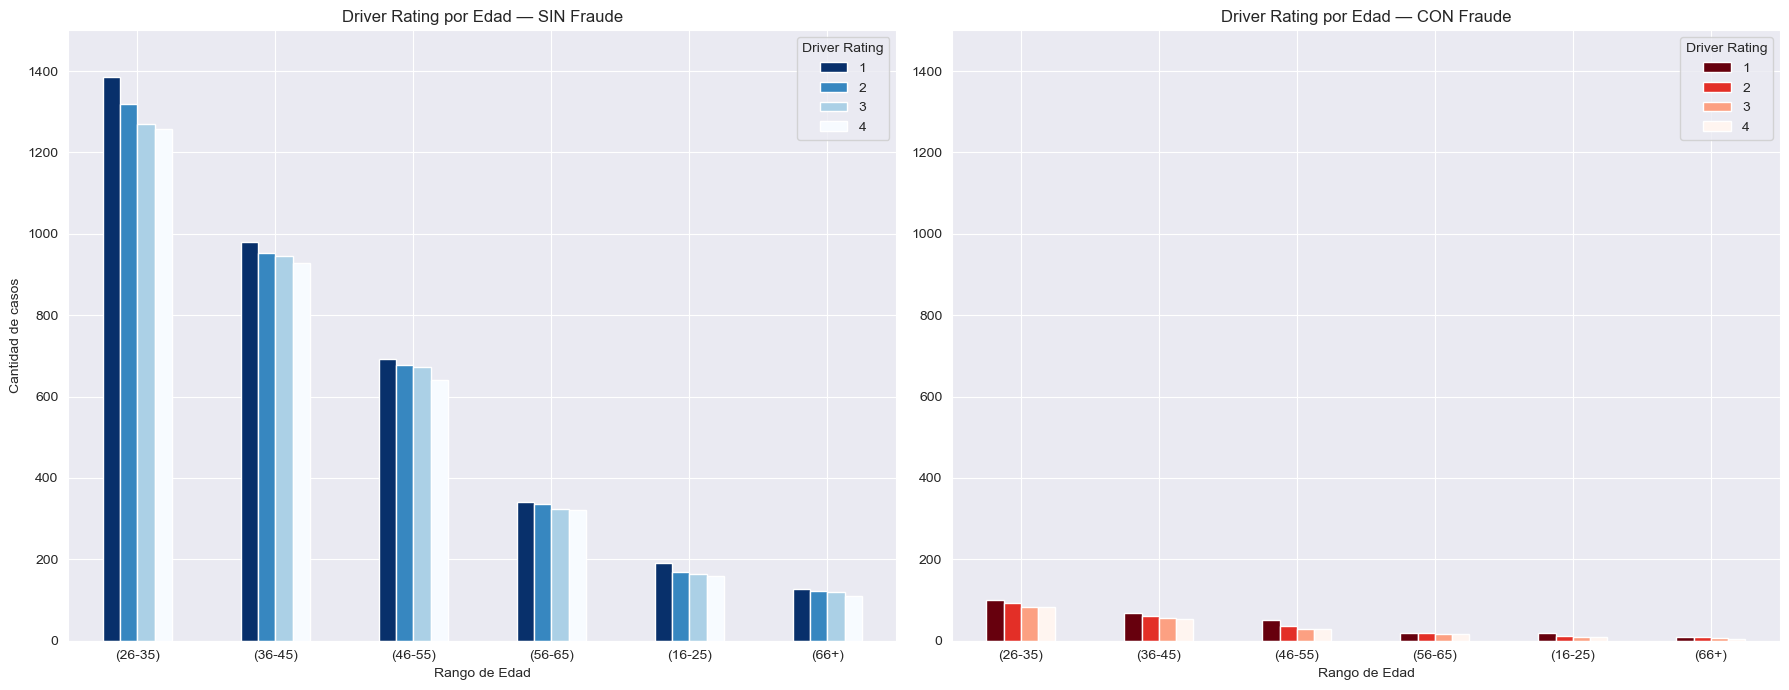

In [561]:
plt.style.use('default')  # resetea estilos raros
sns.set_style("darkgrid")

# color gris bonito
fondo = "#0A0A0A"
fig.patch.set_facecolor(fondo)
axes[0].set_facecolor(fondo)
axes[1].set_facecolor(fondo)
axes[0].grid(False)
axes[1].grid(False)

# Filtrar datasets
df_no_fraud = df1[df1['FraudFound_P'] == 0]
df_fraud = df1[df1['FraudFound_P'] == 1]

# Ordenar ambas tablas
tabla_no_fraud = ordenar_barras_por_grupo(df_no_fraud, cmap="Blues")
tabla_fraud = ordenar_barras_por_grupo(df_fraud, cmap="Reds")

# Crear papelógrafo
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# --- GRAFICO SIN FRAUDE ---
tabla_no_fraud.plot(
    kind='bar',
    ax=axes[0],
    colormap="Blues_r"
)
axes[0].set_title("Driver Rating por Edad — SIN Fraude")
axes[0].set_xlabel("Rango de Edad")
axes[0].set_ylabel("Cantidad de casos")
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(title="Driver Rating")

# --- GRAFICO CON FRAUDE ---
tabla_fraud.plot(
    kind='bar',
    ax=axes[1],
    colormap="Reds_r"
)

axes[0].set_ylim(0, 1500)
axes[1].set_ylim(0, 1500)
axes[1].set_title("Driver Rating por Edad — CON Fraude")
axes[1].set_xlabel("Rango de Edad")
axes[1].set_ylabel("")
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title="Driver Rating")

plt.tight_layout()
plt.show()